In [274]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3
%matplotlib inline

In [275]:
#import previous df from sqlite
con = sqlite3.connect('twitter_hate.db')
sql = """
SELECT * FROM tweets_nlp
"""
with sqlite3.connect('twitter_hate.db') as con:
    df = pd.read_sql_query(sql, con)

In [276]:
tweets = df['tweet_clean']

mentions = []
urls = []
hashtags = []
i = 0
for tweet in tweets:
    tweet = tweet.split()
    mentions.append(tweet.count('mentionhere')+tweet.count('mentionhere:')+tweet.count('"mentionhere:')+tweet.count('&#;mentionhere:'))
    urls.append(tweet.count('urlhere'))
    hashtags.append(tweet.count('hashtaghere'))
    tweet = [token for token in tweet if token not in [';&','']]
    tweet = [token for token in tweet if token not in ['&#;mentionhere:','mentionhere:','"mentionhere:','mentionhere', 'urlhere', 'hashtaghere', 'rt', 'amp']]
    tweet = " ".join(tweet)
    tweets[i] = tweet
    i += 1
    
df['tweet_no_others'] = tweets
df['mention_count'] = mentions
df['url_count'] = urls
df['hashtag_count'] = hashtags

C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [277]:
df.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens,tweet_no_others,mention_count,url_count,hashtag_count
0,17,3,1,2,0,1,""" bitch who do you love """,bitch love,bitch love,bitch love,,,bitch love,2.0,bitch love,0,0,0
1,23,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#1...",fuck bitch dont even suck dick kermit videos b...,fuck bitch do not even suck dick ...,bitch dick kermit videos bout fuck,,suck,bitch dick kermit videos bout fuck suck,13.0,fuck bitch dont even suck dick kermit videos b...,0,0,0
2,38,3,0,2,1,1,""" lames crying over hoes thats tears of a clown """,lames crying hoes thats tears clown,lame cry hoe that s tear clown,lame hoe s tear clown,,cry,lame hoe s tear clown cry,7.0,lames crying hoes thats tears clown,0,0,0
3,59,3,0,3,0,1,"""..All I wanna do is get money and fuck model ...",all i wanna get money fuck model bitches russe...,all i wanna get money fuck model bitch ru...,wanna money fuck model bitch russell simmons,,get,wanna money fuck model bitch russell simmons get,11.0,all i wanna get money fuck model bitches russe...,0,0,0
4,62,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",females think dating pussy cute now stuff make...,mentionhere female think date pussy cute now...,mentionhere female cute stuff,,think date urlhere make,mentionhere female cute stuff think date urlhe...,14.0,females think dating pussy cute now stuff make...,1,1,0


In [278]:
corpus = df['tweet_no_others']

### Bag of Words Features

In [279]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [280]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
df_BOW = pd.DataFrame(cv_matrix, columns=vocab)
df_BOW['class'] = df['class']
df_BOW

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,abraham,...,zimmerman,zimmy,zion,zionist,zipperheads,zoe,zog,zone,zoom,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
BOW_offensive = df_BOW[df_BOW['class'] == 1]
BOW_hate = df_BOW[df_BOW['class'] == 0]
BOW_offensive = BOW_offensive.drop(columns=['class'])
BOW_hate = BOW_hate.drop(columns=['class'])

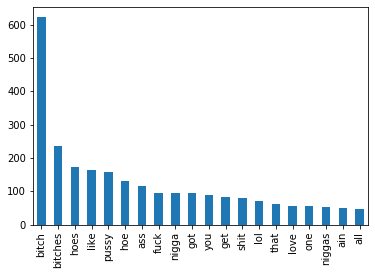

In [282]:
BOW_count_off=BOW_offensive.sum()
BOW_off_largest = BOW_count_off.nlargest(20)
BOW_off_largest.plot(kind='bar')

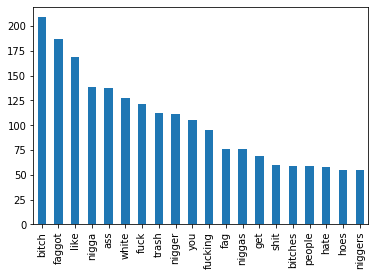

In [283]:
BOW_count_hate=BOW_hate.sum()
BOW_hate_largest = BOW_count_hate.nlargest(20)
BOW_hate_largest.plot(kind='bar')

### Training BOW with Logistic Regression and Decision Tree

In [284]:
X = pd.concat([df_BOW.drop(columns = ['class']), df[['mention_count', 'url_count', 'hashtag_count']]], axis = 1)
y = df['class'].astype(int)

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

In [287]:
param_grid = [{}]
lg = GridSearchCV(LogisticRegression(), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds_lg = lg.fit(X_train, y_train).predict(X_test)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


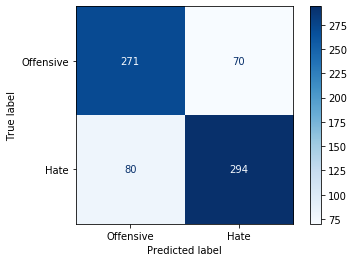

In [288]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Offensive', 'Hate']
plot_confusion_matrix(lg, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [289]:
from sklearn.metrics import classification_report
report_lg_BOW = classification_report( y_test, y_preds_lg)
print(report_lg_BOW)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       341
           1       0.81      0.79      0.80       374

    accuracy                           0.79       715
   macro avg       0.79      0.79      0.79       715
weighted avg       0.79      0.79      0.79       715



In [290]:
importance_logreg = lg.best_estimator_.coef_.tolist()[0]

features = list(df_BOW.columns)
feature_importance_logreg = pd.DataFrame(list(zip(features,importance_logreg)), columns =['features','importance'])
feature_importance_logreg = feature_importance_logreg.sort_values(by='importance')
feature_importance_logreg.head(20)

,features,importance
1455,faggit,-2.108559
3030,niggaz,-2.079960
3027,niggahs,-1.998250
1456,faggot,-1.949334
3033,niggerous,-1.639718
1732,gave,-1.594995
3023,nigerian,-1.555284
2411,kike,-1.518631
4949,whistle,-1.385182
3546,queen,-1.284641


In [291]:
tree = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)

y_preds_tree = tree.fit(X_train, y_train).predict(X_test)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


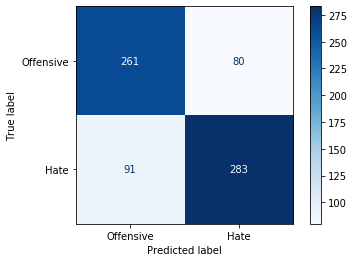

In [292]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [293]:
report_tree = classification_report( y_test, y_preds_tree)
print(report_tree)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       341
           1       0.78      0.76      0.77       374

    accuracy                           0.76       715
   macro avg       0.76      0.76      0.76       715
weighted avg       0.76      0.76      0.76       715



In [294]:
importance_tree = tree.best_estimator_.feature_importances_.tolist()

features = list(df_BOW.columns)
feature_importance_logreg = pd.DataFrame(list(zip(features,importance_tree)), columns =['features','importance'])
feature_importance_logreg = feature_importance_logreg.sort_values(by='importance', ascending = False)
feature_importance_logreg.head(20)

,features,importance
432,bitch,0.090740
434,bitches,0.071617
3535,pussies,0.069759
2046,hoeing,0.066966
2044,hockey,0.054338
3027,niggahs,0.025053
3023,nigerian,0.023572
5138,zzzzzz,0.014328
3025,niggaa,0.008869
1667,fuccing,0.008625


### Word2vec embedding


In [295]:
from gensim.models import word2vec
import nltk

In [296]:
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['faggot', 'nigger', 'nigga','white','queer','gay','coon','kill', 'hate','trash','black','retard','beaner','wetback','homosexual', 'gays']}
similar_words

{'faggot': ['tear', 'fag', 'powered', 'nicest', 'overly'],
 'nigger': ['traditions', 'honor', 'hoodrats', 'tyler', 'republicans'],
 'nigga': ['lame', 'scary', 'twin', 'yah', 'yo'],
 'white': ['trash', 'texarkana', 'trailer', 'lid', 'brainwash'],
 'queer': ['pathetic', 'sweet', 'fotos', 'obama', 'lbum'],
 'gay': ['sucks', 'welcome', 'blacklisted', 'episode', 'cuba'],
 'coon': ['tweets', 'ban', 'its', 'picks', 'work'],
 'kill': ['panthers', 'presser', 'hijack', 'route', 'wr'],
 'hate': ['goddamit', 'cripples', 'rally', 'kkk', 'dairy'],
 'trash': ['white', 'trailer', 'texarkana', 'slave', 'brainwash'],
 'black': ['faves', 'the', 'people', 'pack', 'preventing'],
 'retard': ['guinea', 'fucktards', 'republican', 'armed', 'mom'],
 'beaner': ['opinion', 'goddam', 'pussyed', 'homeless', 'quit'],
 'wetback': ['chinatown', 'slant', 'towelhead', 'bulldozed', 'kraut'],
 'homosexual': ['infiltration', 'gear', 'priesthood', 'sandwiches', 'shelby'],
 'gays': ['wholesome', 'perm', 'fool', 'humble', 'st

In [297]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.506105,-0.229800,-0.363152,-0.535886,-0.026520,-0.957140,-0.865238,-0.185917,0.217747,0.578140,...,-0.383283,-0.358674,-0.149352,-0.908169,0.095669,0.325378,0.151810,-0.738868,0.096069,-1.109549
1,0.249636,-0.258571,-0.349168,0.017806,-0.128595,-0.586897,-0.438253,0.146007,0.251547,0.159555,...,-0.204238,-0.243311,-0.168690,-0.513819,-0.163043,0.282130,0.268516,-0.596103,-0.088420,-1.216779
2,0.135101,-0.165665,-0.148459,-0.236594,0.089040,-0.499186,-0.260654,-0.167711,0.084405,0.162751,...,-0.116640,-0.094055,-0.049863,-0.373047,-0.037258,0.209603,-0.042335,-0.284549,0.095108,-0.687080
3,0.508545,-0.509254,-0.414899,-0.506056,0.074721,-0.791285,-0.530319,-0.158569,0.133872,0.302678,...,-0.291648,-0.321421,-0.419132,-0.621692,0.214972,0.229682,0.244916,-0.231673,0.313054,-0.735694
4,0.265640,-0.226422,-0.075378,-0.251172,-0.232360,-0.473984,-0.222964,-0.225917,0.073581,0.375532,...,-0.002351,-0.021092,0.017239,-0.283206,0.148710,0.249131,-0.029715,-0.312938,0.075269,-1.070971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.384639,-0.419814,-0.089338,0.005814,-0.628487,-0.527565,-0.220804,0.108152,-0.181255,0.419709,...,-0.224912,-0.501526,-0.244193,-0.450845,0.157394,0.734941,0.947787,-0.644177,0.255479,-0.830130
2856,0.483009,-0.686711,0.018624,-0.483838,-0.405409,-0.536809,-0.245619,-0.310263,-0.705977,0.505647,...,0.613306,-0.962653,-0.009567,-0.924114,0.892862,-0.239703,1.550499,-0.763633,0.559370,-0.324418
2857,0.253021,-0.326742,-0.202440,0.106835,-0.229036,-0.103237,-0.055520,0.019371,-0.122511,-0.045844,...,0.080369,-0.311337,0.182356,-0.290433,0.121649,0.179684,0.569461,-0.549247,0.047446,-0.843307
2858,0.341643,0.076964,-0.259367,-0.311987,-0.277611,-0.759661,-0.291327,0.325615,0.375444,0.550312,...,-0.191762,-0.241975,-0.382181,-0.940625,-0.003959,0.587304,-0.262961,-0.261164,0.241907,-0.887689


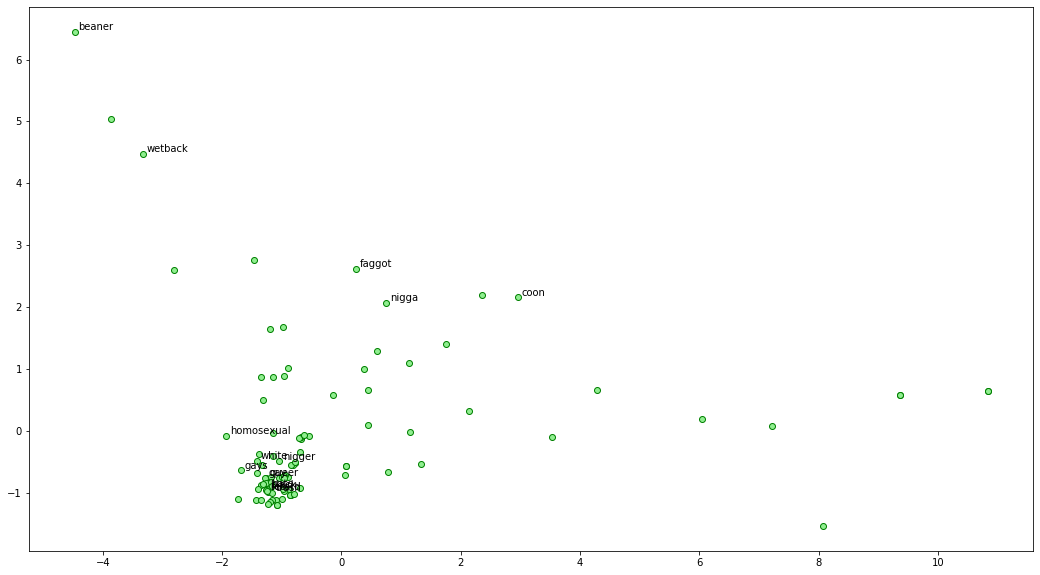

In [244]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = ['faggot', 'nigger', 'nigga','white','queer','gay','coon','kill', 'hate','trash','black','retard','beaner','wetback','homosexual', 'gays']

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [110]:
X_w2v = pd.DataFrame(w2v_feature_array)
y = df['class'].astype(int)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, random_state=42)

In [111]:
lg_w2v = GridSearchCV(LogisticRegression(max_iter = 1000), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_w2v, y_train_w2v), 
                           verbose=2)
y_preds_w2v_lg = lg_w2v.fit(X_train_w2v, y_train_w2v).predict(X_test_w2v)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


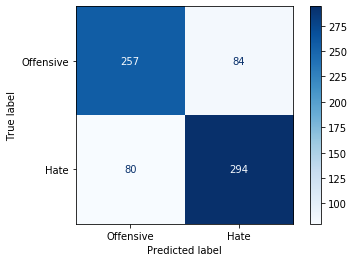

In [112]:
plot_confusion_matrix(lg_w2v, X_test_w2v, y_test_w2v, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [113]:
report_w2v = classification_report( y_test_w2v, y_preds_w2v_lg)
print(report_w2v)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       341
           1       0.78      0.79      0.78       374

    accuracy                           0.77       715
   macro avg       0.77      0.77      0.77       715
weighted avg       0.77      0.77      0.77       715



In [114]:
tree_w2v = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_w2v, y_train_w2v), 
                           verbose=2)
y_preds_w2v_tree = tree_w2v.fit(X_train_w2v, y_train_w2v).predict(X_test_w2v)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


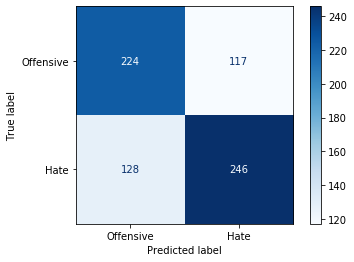

In [115]:
plot_confusion_matrix(tree_w2v, X_test_w2v, y_test_w2v, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [116]:
report_w2v_tree = classification_report( y_test_w2v, y_preds_w2v_tree)
print(report_w2v_tree)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       341
           1       0.68      0.66      0.67       374

    accuracy                           0.66       715
   macro avg       0.66      0.66      0.66       715
weighted avg       0.66      0.66      0.66       715



### Combining BOW and W2V

In [117]:
X_mixed = pd.concat([pd.DataFrame(w2v_feature_array), df_BOW.drop(columns=['class'])], axis=1)
y = df['class'].astype(int)
X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(X_mixed, y, random_state=42)

In [118]:
lg_mixed = GridSearchCV(LogisticRegression(max_iter = 1000), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_mixed, y_train_mixed), 
                           verbose=2)
y_preds_mixed = lg_mixed.fit(X_train_mixed, y_train_mixed).predict(X_test_mixed)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished


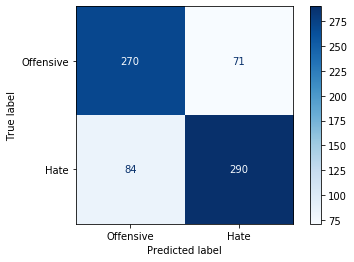

In [119]:
plot_confusion_matrix(lg_mixed, X_test_mixed, y_test_mixed, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [120]:
report_lg_mixed = classification_report( y_test_mixed, y_preds_mixed)
print(report_lg_mixed)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       341
           1       0.80      0.78      0.79       374

    accuracy                           0.78       715
   macro avg       0.78      0.78      0.78       715
weighted avg       0.78      0.78      0.78       715



In [121]:
features = list(X_mixed.columns)
feature_importance_logreg = pd.DataFrame(list(zip(features,importance_logreg)), columns =['features','importance'])
feature_importance_logreg = feature_importance_logreg.sort_values(by='importance')
feature_importance_logreg.head(20)

,features,importance
1455,emoji,-2.108559
3030,muslims,-2.079960
3027,murdered,-1.998250
1456,emojis,-1.949334
3033,muthafucka,-1.639718
1732,found,-1.594995
3023,muhhfuckin,-1.555284
2411,jezzy,-1.518631
4949,wannabe,-1.385182
3546,pray,-1.284641


In [122]:
tree_mixed = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_mixed, y_train_mixed), 
                           verbose=2)
y_preds_mixed_tree = tree_mixed.fit(X_train_mixed, y_train_mixed).predict(X_test_mixed)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.7s
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


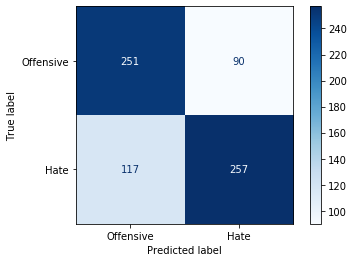

In [123]:
plot_confusion_matrix(tree_mixed, X_test_mixed, y_test_mixed, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [124]:
report_tree_mixed = classification_report( y_test_mixed, y_preds_mixed_tree)
print(report_tree_mixed)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       341
           1       0.74      0.69      0.71       374

    accuracy                           0.71       715
   macro avg       0.71      0.71      0.71       715
weighted avg       0.71      0.71      0.71       715



### Using LIME to interpret predictions

In [299]:
import lime
import lime.lime_tabular

i = np.random.randint(0, X_test.shape[0])

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                                   mode = 'classification',
                                                   feature_names = features,
                                                  class_names = ['Hate', 'Offensive'])

exp = explainer.explain_instance(data_row = X_test.iloc[i].to_numpy(), 
                                 predict_fn = lg.predict_proba)
actual = df_BOW['class'][i]

if actual == 0:
    actual = 'Hate'
else:
    actual = 'Offensive'

print(f'Actual classification: {actual}')
exp.show_in_notebook()

IndexError: list index out of range

### Training CBOW based on twitter dataset

In [10]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corpus)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Using TensorFlow backend.
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Vocabulary Size: 5168
Vocabulary Sample: [('i', 1), ('bitch', 2), ('like', 3), ('bitches', 4), ('ass', 5), ('s', 6), ('nigga', 7), ('hoes', 8), ('fuck', 9), ('pussy', 10)]


In [11]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [12]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['fuck', 'bitch', 'even', 'suck'] -> Target (Y): dont
Context (X): ['bitch', 'dont', 'suck', 'dick'] -> Target (Y): even
Context (X): ['dont', 'even', 'dick', 'kermit'] -> Target (Y): suck
Context (X): ['even', 'suck', 'kermit', 'videos'] -> Target (Y): dick
Context (X): ['suck', 'dick', 'videos', 'bout'] -> Target (Y): kermit
Context (X): ['dick', 'kermit', 'bout', 'fuck'] -> Target (Y): videos
Context (X): ['kermit', 'videos', 'fuck', 'ig'] -> Target (Y): bout
Context (X): ['lames', 'crying', 'thats', 'tears'] -> Target (Y): hoes
Context (X): ['crying', 'hoes', 'tears', 'clown'] -> Target (Y): thats
Context (X): ['all', 'i', 'get', 'money'] -> Target (Y): wanna
Context (X): ['i', 'wanna', 'money', 'fuck'] -> Target (Y): get


In [13]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            516800    
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5168)              521968    
Total params: 1,038,768
Trainable params: 1,038,768
Non-trainable params: 0
_________________________________________________________________
None


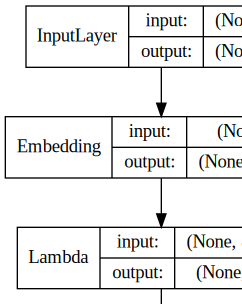

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [103]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 186800.52378857136

Epoch: 2 	Loss: 224056.9714373313

Epoch: 3 	Loss: 229746.46687418967

Epoch: 4 	Loss: 231765.57582517853

Epoch: 5 	Loss: 232720.49580033985



In [157]:
weights = cbow.get_weights()[0]
weights = weights[:5167]
print(weights.shape)
trained_embedding = pd.DataFrame(weights, index=list(id2word.values())[:5167])
trained_embedding
#trained_embedding.to_csv('trained_embedding.csv')

(5167, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
i,-0.222502,0.259196,-0.149339,0.365478,0.104890,-0.211132,0.214763,-0.217084,-0.233150,-0.331670,...,0.381222,-0.089159,-0.116351,0.040895,-0.155371,0.442876,-0.019001,0.220765,0.125817,0.203860
bitch,-0.374511,1.947970,-0.348361,-0.082477,0.320433,0.033585,0.143289,-0.180969,-0.062634,0.062271,...,-0.058646,0.248038,0.231737,0.933990,-0.240578,-0.307575,-0.223981,-0.190205,1.239653,-0.171943
like,0.420282,0.267553,-0.226183,0.264617,0.179408,0.165740,0.691293,0.112533,-0.186938,-0.039674,...,0.223276,0.135990,-0.025943,0.344971,-0.181521,0.056364,-0.199896,-0.035867,0.251254,0.010277
bitches,0.168009,0.395935,-0.082524,0.197108,-0.037274,-0.238570,-0.355305,0.254387,-0.021652,-0.085967,...,0.057170,0.212901,0.203143,0.258056,-0.006875,0.010031,-0.273736,-0.027241,0.122361,0.082325
ass,-0.203083,-0.177824,0.219084,0.174521,0.464803,-0.103060,-0.072733,0.006912,-0.173299,0.087377,...,0.222828,-0.237156,0.109885,0.470472,-0.015852,0.151026,-0.138338,-0.106809,0.152516,-0.002137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sugar,-0.030888,-0.021650,0.061245,0.057789,0.028779,-0.085339,0.035457,-0.080947,0.004483,0.044447,...,0.049663,-0.085424,0.095664,0.001371,0.006318,0.063644,-0.089638,0.005417,0.055207,0.074689
rush,-0.020139,-0.069486,0.022567,-0.007940,0.063400,0.011016,-0.058338,-0.061581,-0.063043,0.018036,...,0.008263,-0.077181,0.016223,-0.003074,-0.017200,0.067855,-0.053452,-0.067983,0.041596,0.001638
buck,0.012096,-0.053386,0.059186,0.022004,0.019282,-0.010376,0.041935,-0.071567,-0.033168,0.075442,...,0.040043,0.000155,0.061157,0.063147,0.015416,0.017106,-0.049785,-0.026271,-0.002968,0.031325
youu,-0.025845,-0.072485,0.038698,-0.000171,0.039669,-0.034721,0.006980,-0.041145,-0.028826,0.033359,...,0.032610,-0.051446,0.026333,-0.018339,0.004803,-0.021310,0.008703,-0.069847,0.051706,0.057505


In [132]:
trained_embedding = pd.read_csv('trained_embedding.csv')
trained_embedding.set_index(trained_embedding['Unnamed: 0'], inplace = True)
trained_embedding = trained_embedding.drop(columns = 'Unnamed: 0')
trained_embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
i,-0.222502,0.259196,-0.149339,0.365478,0.104890,-0.211132,0.214763,-0.217084,-0.233150,-0.331670,...,0.381222,-0.089159,-0.116351,0.040895,-0.155371,0.442876,-0.019001,0.220765,0.125817,0.203860
bitch,-0.374511,1.947970,-0.348361,-0.082477,0.320433,0.033585,0.143289,-0.180969,-0.062634,0.062271,...,-0.058646,0.248038,0.231737,0.933990,-0.240578,-0.307575,-0.223981,-0.190205,1.239653,-0.171943
like,0.420282,0.267553,-0.226183,0.264617,0.179408,0.165740,0.691293,0.112533,-0.186938,-0.039674,...,0.223276,0.135990,-0.025943,0.344971,-0.181521,0.056364,-0.199896,-0.035867,0.251254,0.010277
bitches,0.168009,0.395935,-0.082524,0.197108,-0.037274,-0.238570,-0.355305,0.254387,-0.021652,-0.085967,...,0.057170,0.212901,0.203143,0.258056,-0.006875,0.010031,-0.273736,-0.027241,0.122361,0.082325
ass,-0.203083,-0.177824,0.219084,0.174521,0.464803,-0.103060,-0.072733,0.006912,-0.173299,0.087377,...,0.222828,-0.237156,0.109885,0.470472,-0.015852,0.151026,-0.138338,-0.106809,0.152516,-0.002137


In [246]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(trained_embedding)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]].argsort()[1:6]] 
                   for search_term in ['faggot', 'nigger', 'nigga','white','queer','gay','coon','kill', 'hate','trash','black','retard','beaner','wetback','homosexual', 'gays']}

similar_words

(5167, 5167)


{'faggot': ['nigger', 'monkey', 'they', 'redneck', 'queer'],
 'nigger': ['niggers', 'monkey', 'ur', 'please', 'making'],
 'nigga': ['niggas', 'boss', 'might', 'broke', 'up'],
 'white': ['park', 'school', 'every', 'black', 'president'],
 'queer': ['his', 'lookin', 'check', 'fan', 'henny'],
 'gay': ['joe', 'fo', 'muzzie', 'looking', 'ol'],
 'coon': ['check', 'forget', 'took', 'for', 'water'],
 'kill': ['thug', 'street', 'cracker', 'internet', 'dirty'],
 'hate': ['live', 'd', 'swear', 'single', 'chinks'],
 'trash': ['people', 'man', 'faggots', 'jews', 'racist'],
 'black': ['probably', 'use', 'knows', 'filthy', 'followers'],
 'retard': ['wetbacks', 'throat', 'everyone', 'gook', 'muzzie'],
 'beaner': ['teabaggers', 'killing', 'niglet', 'inch', 'election'],
 'wetback': ['clearly', 'yelling', 'anti', 'dc', 'pops'],
 'homosexual': ['lgbtq', 'media', 'mgr', 'uwi', 'sideways'],
 'gays': ['jason', 'keri', 'texts', 'ona', 'arrested']}

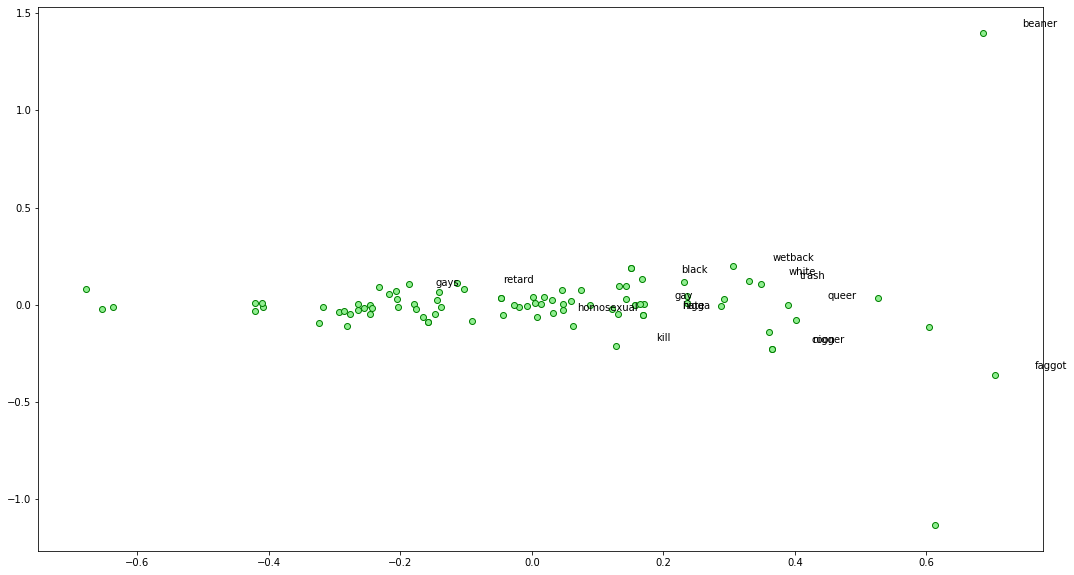

In [135]:
#unsupervised from trained word embedding CBOW

from sklearn.decomposition import PCA
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = trained_embedding.loc[words]

pca = PCA(n_components=5)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels =  ['faggot', 'nigger', 'nigga','white','queer','gay','coon','kill', 'hate','trash','black','retard','beaner','wetback','homosexual', 'gays']

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [227]:
tokenized_corpus = [wpt.tokenize(document) for document in corpus]

def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.loc[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

features = [average_word_vectors(tokenized_sentence, trained_embedding, trained_embedding.index,100)
                    for tokenized_sentence in tokenized_corpus]

twitter_feature_array = pd.DataFrame(np.array(features))
twitter_feature_array.to_csv('twitter_feature_array.csv')

In [242]:
twitter_feature_array

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.092240,0.655190,-0.054113,-0.001526,0.245873,-0.047122,-0.195120,-0.241070,-0.024567,-0.028244,...,-0.009025,0.098637,0.100423,0.644974,-0.122191,-0.027687,-0.357734,-0.078975,0.641340,-0.015340
1,-0.036190,0.052367,0.056565,0.040076,0.153519,-0.078184,-0.050946,-0.083378,-0.090013,0.050202,...,0.086134,-0.051438,0.051010,0.250482,-0.081903,0.051434,-0.121692,-0.058639,0.217542,-0.000544
2,-0.084097,0.030291,0.036536,0.039797,0.106109,0.002597,0.060696,-0.047483,-0.047069,0.039118,...,0.095309,-0.026714,0.062526,0.106153,-0.041362,0.022510,-0.119272,0.038568,0.058572,0.055155
3,0.007605,0.010492,0.032044,0.126457,0.047635,-0.069211,-0.054946,-0.011408,-0.095851,0.020046,...,0.103008,-0.043711,0.106259,0.163596,0.011475,0.101757,-0.065334,-0.043148,0.092530,0.035289
4,-0.100222,-0.060809,0.076636,-0.023275,0.134729,-0.025185,0.020398,-0.055950,-0.117073,-0.033665,...,0.097490,-0.023263,0.055456,0.143194,-0.056619,0.058868,-0.130279,-0.070994,0.091588,0.107159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.082106,0.163869,0.087209,0.145215,0.068083,-0.082497,0.035079,0.005989,-0.094450,0.008168,...,0.123419,0.020186,0.101862,0.181165,-0.087126,0.010883,-0.165174,-0.039096,0.133706,0.055895
2856,-0.178984,0.105335,0.093642,0.143920,0.036653,-0.008155,-0.112179,-0.071968,-0.040059,0.151145,...,0.115077,-0.204067,0.050137,0.083072,-0.003976,0.115818,-0.214303,-0.085685,0.223759,0.076014
2857,-0.014508,0.042220,0.106782,0.091900,0.062218,-0.030795,-0.054249,-0.053927,-0.074365,0.050654,...,0.079109,-0.066249,0.107125,0.177597,0.024534,0.031706,-0.042205,-0.058283,0.085021,0.021203
2858,0.001350,0.051687,0.038868,0.093754,0.076561,-0.059643,0.140547,-0.080700,-0.093650,0.042169,...,0.129109,-0.081700,0.063090,0.126368,-0.074151,0.118755,-0.101002,-0.031564,0.103586,0.082630


In [229]:
X_twit = pd.DataFrame(twitter_feature_array)
y = df['class'].astype(int)
X_train_twit, X_test_twit, y_train_twit, y_test_twit = train_test_split(X_twit, y, random_state=42)

In [230]:
lg_twit = GridSearchCV(LogisticRegression(max_iter = 1000), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_w2v, y_train_w2v), 
                           verbose=2)
y_preds_twit_lg = lg_twit.fit(X_train_twit, y_train_twit).predict(X_test_twit)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


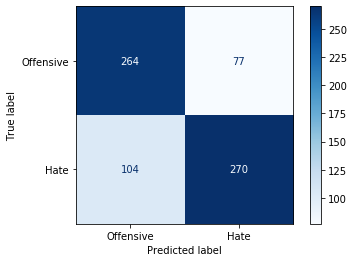

In [231]:
plot_confusion_matrix(lg_twit, X_test_twit, y_test_twit, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [300]:
report_lg_twit = classification_report( y_test_twit, y_preds_twit_lg)
print(report_lg_twit)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       341
           1       0.78      0.72      0.75       374

    accuracy                           0.75       715
   macro avg       0.75      0.75      0.75       715
weighted avg       0.75      0.75      0.75       715



In [236]:
tree_twit = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train_w2v, y_train_w2v), 
                           verbose=2)
y_preds_twit_tree = tree_twit.fit(X_train_twit, y_train_twit).predict(X_test_twit)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


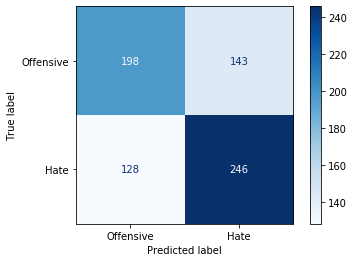

In [237]:
plot_confusion_matrix(tree_twit, X_test_twit, y_test_twit, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [239]:
report_tree_twit = classification_report( y_test_twit, y_preds_twit_tree)
print(report_tree_twit)

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       341
           1       0.63      0.66      0.64       374

    accuracy                           0.62       715
   macro avg       0.62      0.62      0.62       715
weighted avg       0.62      0.62      0.62       715

